# Support Vector Machine Algorithm

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:

In [1]:
#Importing libraries and dataset
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
#EDA
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#Know about the target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#Use pandas to see your data
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [6]:
#append target variable in dataframe
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [8]:
# values with target 1
df[df.target==1].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target  
50       1  
51       1  
52       1  
53       1  
54       1

In [9]:
#values with target 2
df[df.target==2].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target  
100       2  
101       2  
102       2  
103       2  
104       2

In [10]:
#creating one more column with name of flower name
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [11]:
#data Visualisation
from matplotlib import pyplot as plt

In [12]:
%matplotlib inline

In [13]:
#creating 3 new dataframe each for every flower
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [27]:
#data frame of Setosa
df0.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [28]:
#data frame of Versicolor
df1.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target flower_name  
50       1  versicolor  
51       1  versicolor  
52       1  versicolor  
53       1  versicolor  
54       1  versicolor

In [29]:
#data frame of Virginica
df2.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target flower_name  
100       2   virginica  
101       2   virginica  
102       2   virginica  
103       2   virginica  
104       2   virginica

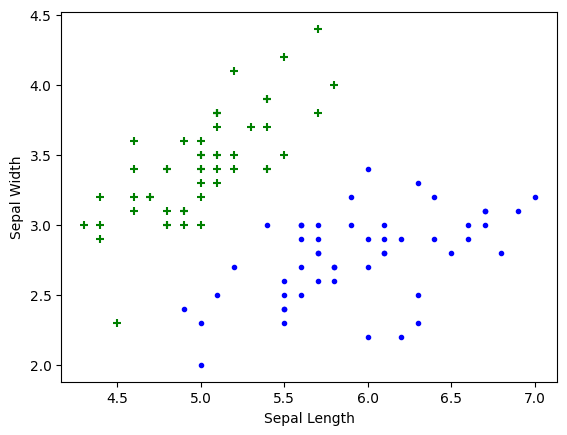

In [14]:
#draw scatterplot
#Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

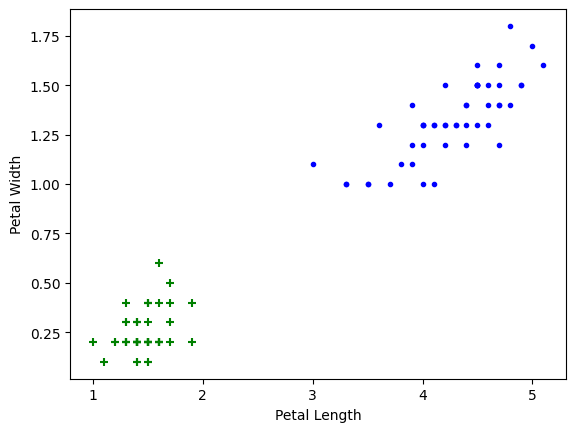

In [15]:
#Petal length vs Pepal Width (Setosa vs Versicolor)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [16]:
#Train Using Support Vector Machine (SVM)


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
#dropping column
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [20]:
#splitting our data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
#importing SVM
from sklearn.svm import SVC
model = SVC()

In [23]:
#tranning the data
model.fit(X_train, y_train)

SVC()

In [25]:
#checking the accuracy of our model
model.score(X_test, y_test)

0.9666666666666667

In [26]:
#let's start prediction
model.predict([[4.8,3.0,1.5,0.3]])

/Users/techi.s./Library/Python/3.8/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

# Exercise

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1-Measure accuracy of your model using different kernels such as rbf and linear.
2-Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3-Use 80% of samples as training data size